# Trees

![](https://mathworld.wolfram.com/images/eps-gif/Hydrocarbons_800.gif)

Tree is a connected graph with no cycles. Nodes with $deg(n)=1$ are called **leaf nodes**. Others - inner nodes.

$|E| = |V| - 1$

## Proove it by induction

1. $|V| = 1$...

2. Let for $|V| = k$ ...

3. Show for $|V| = k+1$

## Trees in CS
In data structures we usually use specific improvement of a tree: directed tree with a dedicated root.

In [29]:
class Node():
    def __init__(self, val, children=None):
        self.val = val
        self.children = children or []
        
    def add_child(self, node):
        self.children.append(node)
        
    def __str__(self):
        return self.val
    
    def __repr__(self):
        return str(self)
    
    def __tree__(self):
        return self.val +  " [" + ", ".join(ch.__tree__() for ch in self.children) + "]"
        

root = Node("root")
nodes = list(Node(str(x)) for x in range(5))
a, b, c, d, e = nodes[0], nodes[1], nodes[2], nodes[3], nodes[4]

root.add_child(a)
root.add_child(b)
b.add_child(c)
b.add_child(d)
a.add_child(e)

print(root.__tree__())

root [0 [4 []], 1 [2 [], 3 []]]


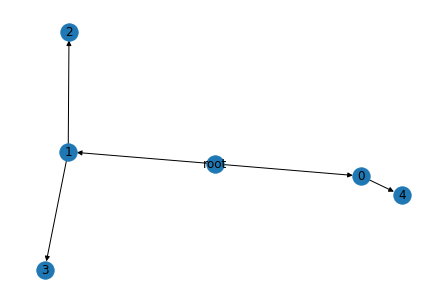

In [85]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

def traverse(node):
    # actions here. This is called preorder traversal
    for child in node.children:
        G.add_edge(node, child)
    # end of action
    
    for child in node.children:
        traverse(child)
        
traverse(root)
nx.draw(G, with_labels=True)
plt.show()

## Spanning tree

Spanning tree is a subgraph of a connected graph which is a tree. Spanning trees are used in multiple optimization problems.


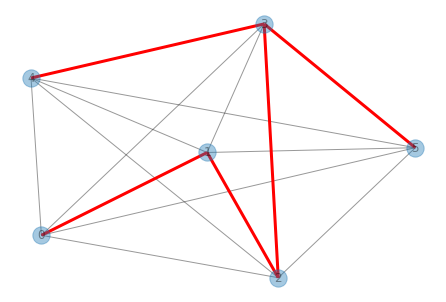

In [51]:
G = nx.complete_graph(6)
G2 = nx.random_powerlaw_tree(6)

layout = nx.spring_layout(G)
nx.draw(G, layout, with_labels=True)
nx.draw_networkx_edges (G2, layout, edge_color='red', width=3.)
plt.show()

## How many different [spanning] trees exist?

Cayley's formula:

$\huge T = n^{n-2}$

There exist multiple proofs. 
- E.g. [proof by induction](https://math.mit.edu/research/highschool/primes/Switzerland/2018/7-Cayley.pdf)
- One is based on Laplacian matrix determinant computation: it is equal to the number of spanning trees.

### $\color{red}{Problem}$

First, let's refresh, what is:
- complete graph $K_n$
- determinant $\Delta A$
- Laplacian matrix

C:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


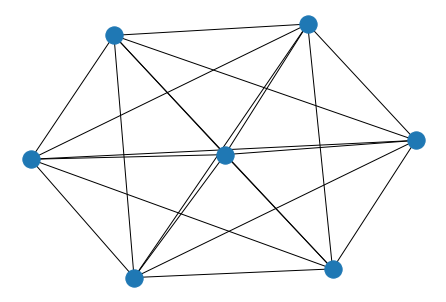

0.0
4.0
-12.000000000000005


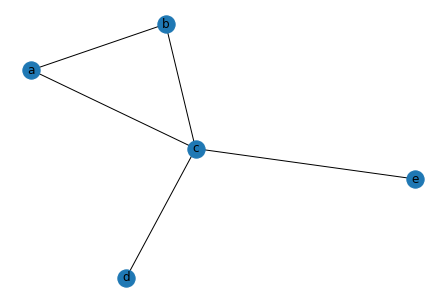

[[ 2 -1 -1  0  0]
 [-1  2 -1  0  0]
 [-1 -1  4 -1 -1]
 [ 0  0 -1  1  0]
 [ 0  0 -1  0  1]]


In [110]:
import networkx as nx
import numpy as np

G = nx.complete_graph(7)
nx.draw(G)
plt.show()

M = np.matrix([
    [1., 0., 1.],
    [0., 2., 0,],
    [2., 4., 2.]
])

print(np.linalg.det(M))
M[1, 0] = 1
print(np.linalg.det(M))
M[1, 0] = -3
print(np.linalg.det(M))


G2 = nx.Graph()
G2.add_edges_from(["ab", "bc", "cd", "ac", "ce"])
nx.draw(G2, with_labels=True)
plt.show()

print(nx.laplacian_matrix(G2).todense())

Write the code that computes a determinant of any complement of Laplacian matrix for a complete graph $K_n$. 

Complement's formula:

$A_{i,j}=(-1)^{i+j} * M_{i,j}$ where $M_{i,j}$ is a minor - determinat of a matrix where $i$-th row and $j$-th column are removed.

Compare your result with Cayley's formula.

In [92]:
import numpy as np

def det(M):
    return np.linalg.det(M)

def L(n):
    # TODO write a complete Laplacian graph
    return np.zeros((n, n))
    
def minor_matrix(M, i, j):
    return np.delete(np.delete(M, i, axis=0), j, axis=1)

def complement(M, i, j):
    # TODO implement formula here
    return 0

M = L(6)
print(M)
print(det(M))
print(minor(M, 0, 0))
print(complement(M, 0, 0))

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
0.0
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0
